# CAProject Linear Regression Final

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from sklearn import preprocessing

In [2]:
df = pd.read_csv("day.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
df.isnull().sum()
#no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
features_drop = ["instant","dteday"]
bikedata = df.drop(features_drop, axis=1)
#dropping the features that we do not want to use
print(bikedata)

     season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1   0     1        0        6           0           2  0.344167   
1         1   0     1        0        0           0           2  0.363478   
2         1   0     1        0        1           1           1  0.196364   
3         1   0     1        0        2           1           1  0.200000   
4         1   0     1        0        3           1           1  0.226957   
..      ...  ..   ...      ...      ...         ...         ...       ...   
726       1   1    12        0        4           1           2  0.254167   
727       1   1    12        0        5           1           2  0.253333   
728       1   1    12        0        6           0           2  0.253333   
729       1   1    12        0        0           0           1  0.255833   
730       1   1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered   cnt  
0    0.36362

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBD4BE0188>,
      dtype=object)

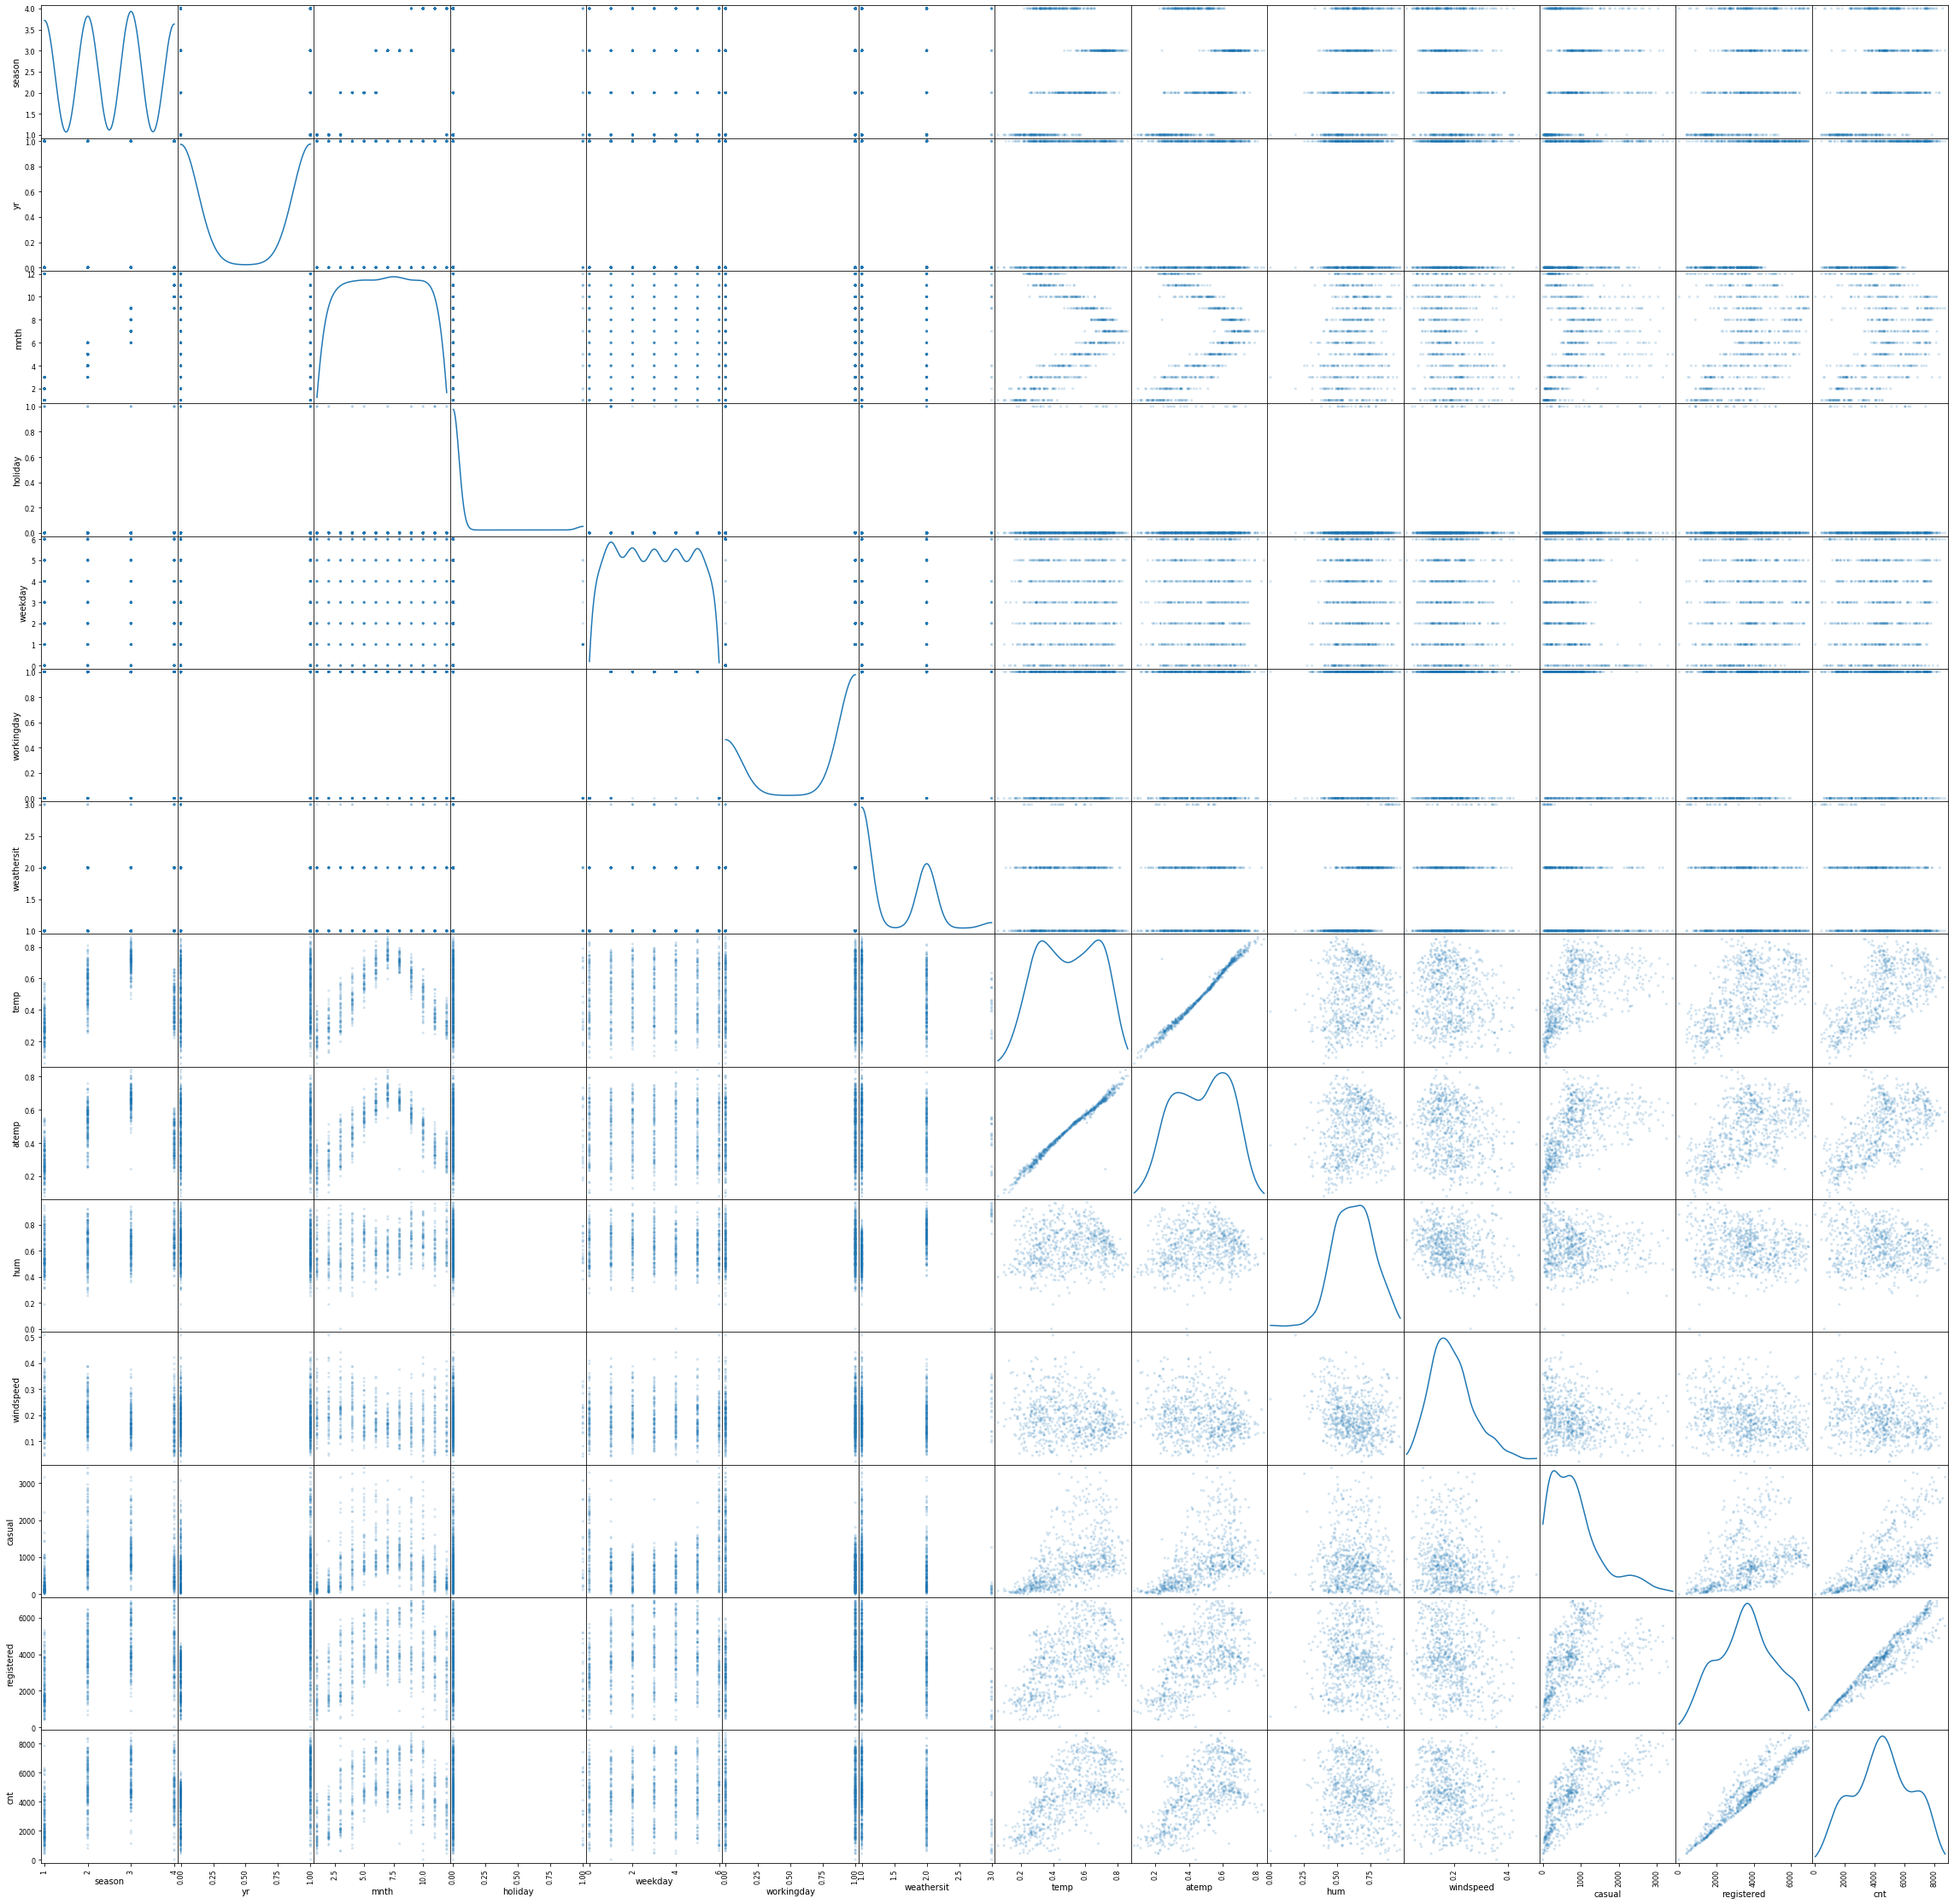

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(bikedata, alpha=0.2, figsize=(40, 40), diagonal='kde')

In [7]:
bikedata.corr()
#checking the correlation between the features
#season and mnth = 0.831
#temp and atemp = 0.991
#registered and casual adds up to cnt

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


# Features used: yr,mnth,workingday,weathersit,atemp,hum,windspeed

In [8]:
features_drop = ["instant","dteday","holiday","weekday","temp","casual","registered","season"]
bikedata = df.drop(features_drop, axis=1)
#dropping the features that we do not want to use
bikedata.head()

,yr,mnth,workingday,weathersit,atemp,hum,windspeed,cnt
0,0,1,0,2,0.363625,0.805833,0.160446,985
1,0,1,0,2,0.353739,0.696087,0.248539,801
2,0,1,1,1,0.189405,0.437273,0.248309,1349
3,0,1,1,1,0.212122,0.590435,0.160296,1562
4,0,1,1,1,0.229270,0.436957,0.186900,1600


In [9]:
x = bikedata.drop("cnt", axis=1)
y = bikedata["cnt"]
print(x)
print(y)

     yr  mnth  workingday  weathersit     atemp       hum  windspeed
0     0     1           0           2  0.363625  0.805833   0.160446
1     0     1           0           2  0.353739  0.696087   0.248539
2     0     1           1           1  0.189405  0.437273   0.248309
3     0     1           1           1  0.212122  0.590435   0.160296
4     0     1           1           1  0.229270  0.436957   0.186900
..   ..   ...         ...         ...       ...       ...        ...
726   1    12           1           2  0.226642  0.652917   0.350133
727   1    12           1           2  0.255046  0.590000   0.155471
728   1    12           0           2  0.242400  0.752917   0.124383
729   1    12           0           1  0.231700  0.483333   0.350754
730   1    12           1           2  0.223487  0.577500   0.154846

[731 rows x 7 columns]
0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Lengt

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
#importing the necessary for linear regression

In [11]:
sum = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = i)
    linReg = LinearRegression()
    linReg.fit(x_train, y_train)
    y_predict = linReg.predict(x_test)
    sum += r2_score(y_test, y_predict)
print(sum/100) #mean R2 value to reduce error in sampling

0.7554427761953773


# Features used: season,yr,mnth,workingday,atemp,hum,windspeed

Highest R2

In [12]:
features_drop = ["instant","dteday","holiday","weekday","temp","casual","registered"]
bikedata = df.drop(features_drop, axis=1)
#dropping the features that we do not want to use
x = bikedata.drop("cnt", axis=1)
y = bikedata["cnt"]
sum = 0
print("start time is:\n{0}".format(datetime.now().time()))
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = i)
    linReg = LinearRegression()
    linReg.fit(x_train, y_train)
    y_predict = linReg.predict(x_test)
    sum += r2_score(y_test, y_predict)
print("end time is:\n{0}".format(datetime.now().time()))
print(sum/100) #mean R2 value to reduce error in sampling

start time is:
16:45:00.038705
end time is:
16:45:00.357788
0.7802041073257971


# Features used: season,workingday,atemp,hum,windspeed

In [13]:
features_drop = ["instant","dteday","holiday","weekday","temp","casual","registered","weathersit","yr","mnth"]
bikedata = df.drop(features_drop, axis=1)
#dropping the features that we do not want to use
x = bikedata.drop("cnt", axis=1)
y = bikedata["cnt"]
sum = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = i)
    linReg = LinearRegression()
    linReg.fit(x_train, y_train)
    y_predict = linReg.predict(x_test)
    sum += r2_score(y_test, y_predict)
print(sum/100) #mean R2 value to reduce error in sampling

0.49082620470092203


# Features used: yr,mnth,workingday,atemp,hum,windspeed

In [14]:
features_drop = ["instant","dteday","holiday","weekday","temp","casual","registered","weathersit","season"]
bikedata = df.drop(features_drop, axis=1)
#dropping the features that we do not want to use
x = bikedata.drop("cnt", axis=1)
y = bikedata["cnt"]
sum = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = i)
    linReg = LinearRegression()
    linReg.fit(x_train, y_train)
    y_predict = linReg.predict(x_test)
    sum += r2_score(y_test, y_predict)
print(sum/100) #mean R2 value to reduce error in sampling

0.7397163953761461


# PCA applied to highest R2 feature set

After testing different features set for training, the best R2 score is achieved with features: 'season','yr','mnth','workingday','atemp','hum','windspeed'.

We will now perform PCA to see if the R2 score can be increased

In [15]:
features_drop = ["instant","dteday","holiday","weekday","temp","casual","registered"]
bikedata = df.drop(features_drop, axis=1)
#dropping the features that we do not want to use
x = bikedata.drop("cnt", axis=1)
y = bikedata["cnt"]

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

x = principalDf
print (x)
print(pca.explained_variance_ratio_)

     principal component 1  principal component 2  principal component 3
0                 5.713283               0.145043               0.631569
1                 5.714778               0.145036               0.615213
2                 5.726050              -0.075267              -0.169479
3                 5.724027              -0.075533              -0.146749
4                 5.725334              -0.079386              -0.170543
..                     ...                    ...                    ...
726              -4.884860               2.942271              -0.052939
727              -4.885502               2.936202              -0.063702
728              -4.887541               2.981216              -0.215457
729              -4.877390               2.792418              -1.181353
730              -4.885048               2.938580              -0.064944

[731 rows x 3 columns]
[0.9163752  0.02572906 0.02208169]


In [16]:
sum = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = None)
    linReg = LinearRegression()
    linReg.fit(x_train, y_train)
    y_predict = linReg.predict(x_test)
    sum += r2_score(y_test, y_predict)
print(sum/100) #mean R2 value to reduce error in sampling

0.32884379712175266


The R2 value drops drastically after PCA

# Neural Network

In [17]:
from sklearn.neural_network import MLPRegressor

features_drop = ["instant","dteday","holiday","weekday","temp","casual","registered"]
bikedata = df.drop(features_drop, axis=1)
#dropping the features that we do not want to use
x = bikedata.drop("cnt", axis=1).values
y = bikedata["cnt"].values
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =0)

clf = MLPRegressor(hidden_layer_sizes=(40,), max_iter=1000,
                   solver='lbfgs', activation='relu', verbose=True)
a = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
r2_score(y_test, y_predict)

0.8291275480538478